Step 1 - import

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'/Users/meghanmcgrath/Documents/Instacart Basket Analysis'

In [4]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_large_49.pkl'))

Step 2 - create a bar chart, a histogram, a scatterplot, and a line chart

In [5]:
# Creating a subset
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [6]:
big = df_merged[dev]
small = df_merged[~dev]

In [7]:
df_merged.shape

(32404859, 35)

In [8]:
len(big) + len(small)

32404859

Bar Chart

AttributeError: 'Axes' object has no attribute 'rename'

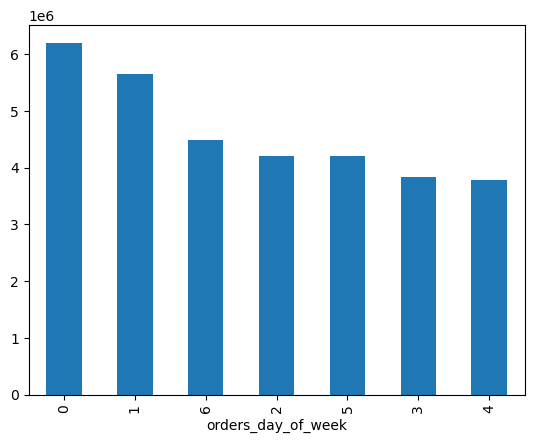

In [9]:
bar_1 = df_merged['orders_day_of_week'].value_counts().plot.bar()
day_names = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: ' Friday', 6: 'Saturday'}
bar_1 = bar_1.rename(index=day_names)
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day')
plt.savefig(os.path.join(path_2, '04 Analysis','Visualizations', 'orders_by_day.png'))

Histogram

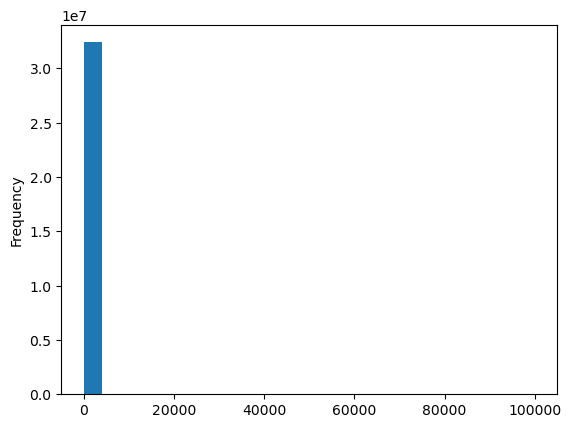

In [11]:
hist = df_merged['prices'].plot.hist(bins=25)

In [13]:
df_merged.loc[df_merged['prices'] > 100]

,user_id,first_name,last_name,gender,state,age,date_joined,dependants,family_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_order_frequency,median_days_btwn_orders,order_frequency,_merge
5594,117740,Lisa,Sparks,Female,Oregon,55,2017-01-01,1,married,292759,...,busiest days,Most orders,84,Loyal customer,36.928431,High spender,5.108268,4.0,Frequent customer,both
10355,31590,Beverly,Sanford,Female,Montana,46,2017-01-01,0,single,154076,...,busiest days,Average orders,38,Regular customer,58.139865,High spender,10.104530,8.0,Frequent customer,both
27973,100958,Benjamin,Parsons,Male,North Dakota,18,2017-01-02,2,living with parents and siblings,113408,...,regularly busy days,Average orders,5,New customer,627.991667,High spender,18.415584,11.0,Regular customer,both
27974,100958,Benjamin,Parsons,Male,North Dakota,18,2017-01-02,2,living with parents and siblings,113408,...,busiest days,Most orders,5,New customer,627.991667,High spender,18.415584,11.0,Regular customer,both
27975,100958,Benjamin,Parsons,Male,North Dakota,18,2017-01-02,2,living with parents and siblings,113408,...,busiest days,Most orders,5,New customer,627.991667,High spender,18.415584,11.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32391295,5519,Kathy,Daniel,Female,Georgia,78,2020-04-01,3,married,262610,...,least busy days,Most orders,53,Loyal customer,69.638604,High spender,6.627807,7.0,Frequent customer,both
32391296,5519,Kathy,Daniel,Female,Georgia,78,2020-04-01,3,married,262610,...,regularly busy days,Average orders,53,Loyal customer,69.638604,High spender,6.627807,7.0,Frequent customer,both
32391297,5519,Kathy,Daniel,Female,Georgia,78,2020-04-01,3,married,262610,...,regularly busy days,Most orders,53,Loyal customer,69.638604,High spender,6.627807,7.0,Frequent customer,both
32396982,140589,Clarence,Harper,Male,Maryland,26,2020-04-01,0,single,154845,...,regularly busy days,Average orders,9,New customer,876.974783,High spender,19.330097,20.0,Regular customer,both


In [14]:
df_merged.loc[df_merged['prices'] >100, 'prices'] = np.nan

In [15]:
df_merged['prices'].max()

25.0

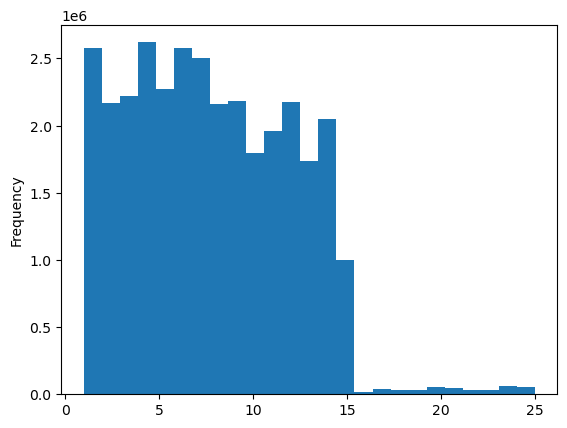

In [23]:
hist_1 = df_merged['prices'].plot.hist(bins=25)

Line

In [17]:
df_2 = small[['orders_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


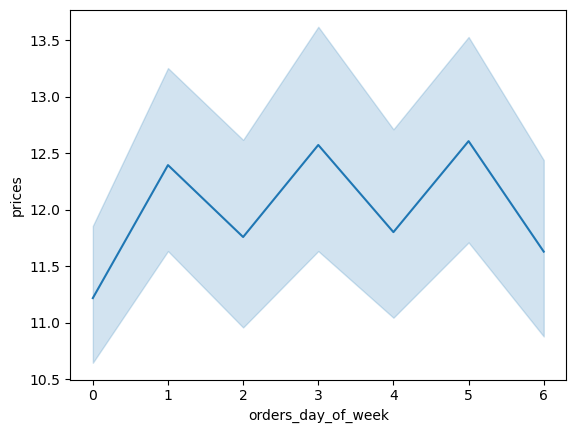

In [25]:
line_1 = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

Step 4 - Create a bar chart from the “loyalty_flag” column

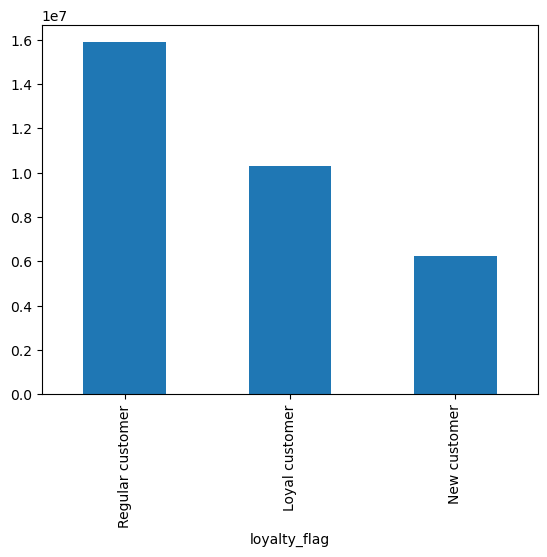

In [26]:
bar_2 = df_merged['loyalty_flag'].value_counts().plot.bar()


Step 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   user_id                  int64         
 1   first_name               object        
 2   last_name                object        
 3   gender                   object        
 4   state                    object        
 5   age                      int64         
 6   date_joined              datetime64[ns]
 7   dependants               int64         
 8   family_status            object        
 9   income                   int64         
 10  product_id               int64         
 11  product_name             object        
 12  aisle_id                 int64         
 13  department_id            int64         
 14  prices                   float64       
 15  order_id                 int64         
 16  order_number             int64         
 17  orders_day_of_week       

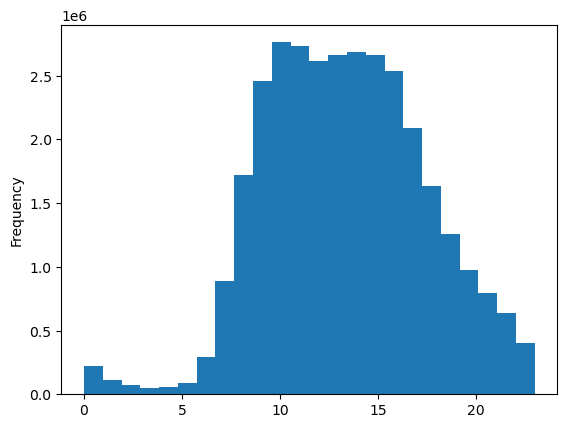

In [28]:
hist_2 = df_merged['order_hour_of_day'].plot.hist(bins=24)

The lease busy times are in the early morning from 1 - 6 AM. Unsurprisingly, we see orders steadily increase as the day goes on with peak hours ~9 AM to 5 PM~. After, we see a decline again into the evening hours.

Step 6 - determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [31]:
# Creating a subset
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [33]:
big = df_merged[dev]
small = df_merged[~dev]

In [34]:
len(big) + len(small)

32404859

In [37]:
df_merged.shape

(32404859, 35)

In [41]:
df_4=small[['dependants', 'age']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


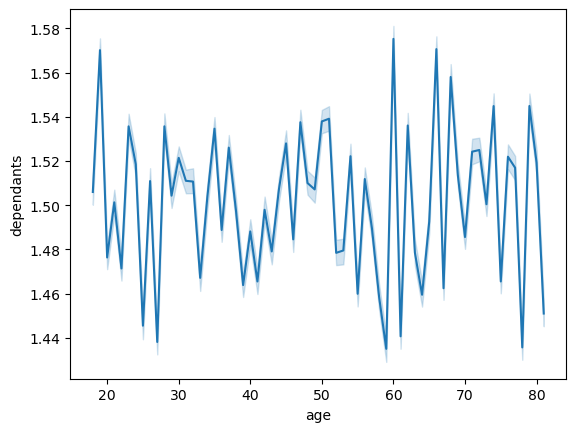

In [42]:
line_4 = sns.lineplot(data = df_4, x = 'age', y = 'dependants')

There is no correlation between age and dependants.

Step 7 - create a scatterplot to explore whether there’s a connection between age and spending power (income)

In [45]:
df_5=small[['income', 'age']]

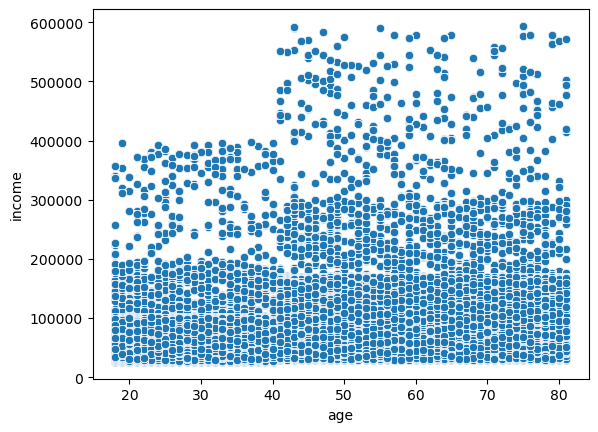

In [46]:
scat_1 = sns.scatterplot(data = df_5, x = 'age', y = 'income')

There is no correlation between age and income.

Step 8 - export visualizations

In [47]:
scat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' , 'scatterplot_age_income.png'))

In [48]:
line_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' , 'line_age_dependants.png'))

In [49]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' , 'hist_order_hour_of_day.png'))

In [50]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' , 'bar_customer_loyalty.png'))

In [51]:
line_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' , 'line_prices_order_day_of_week.png'))

In [52]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' , 'hist_prices.png'))

In [53]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations' , 'bar_order_day_of_week.png'))